In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
np.sqrt(1000)

31.622776601683793

In [8]:
sol = Solver(imax=10, jmax=10, use_morton=True)

/home/bryan/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:71: UserWarning: Non-standard image type; displaying image with stretched contrast.
  warnings.warn("Non-standard image type; displaying image with "
/home/bryan/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "
/home/bryan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


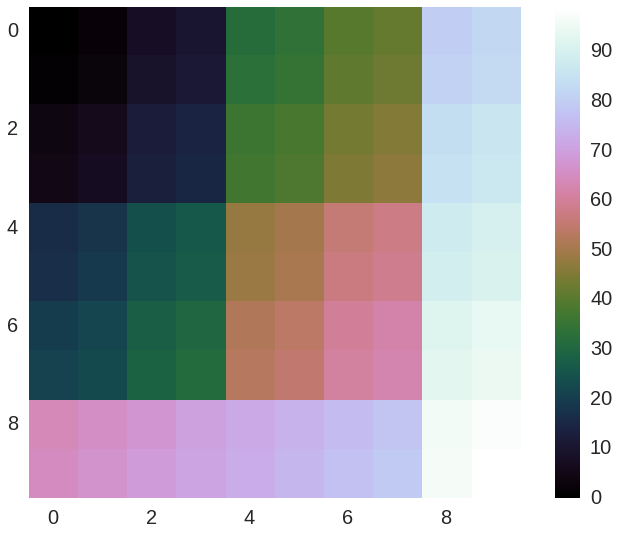

In [9]:
ski.io.imshow(sol.logical_index_mat)
plt.grid(False)

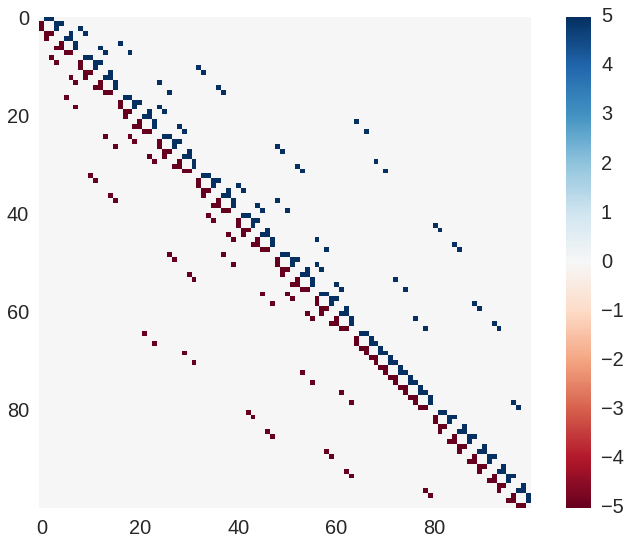

In [10]:
ski.io.imshow(sol.A)
plt.grid(False)

Looks pretty reasonable. Nice.

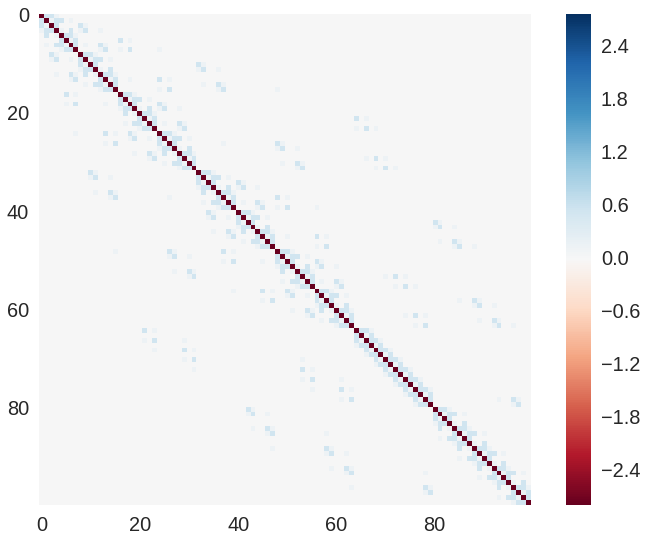

In [11]:
ski.io.imshow(sol.zeta)
plt.grid(False)

Yes. This looks *solid*. Most of the weight on the diagonal as we expect, and negative.

In [16]:
solution = sol.run()

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.96073707e-17   5.92147414e-15   5.92147414e-15   9.90820179e-13
   4.73836361e-13   1.89664817e-11   6.38028014e-11   1.93408024e-09
   4.73865968e-13   6.38065911e-11   1.89724032e-11   1.93464471e-09
   3.17168759e-09   7.12982817e-08   7.13093038e-08   1.36713763e-06
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.80395795e-10   2.63544152e-08   3.06972773e-09   1.12200837e-07
   7.49023501e-07   1.95292941e-05   4.03840764e-06   1.47705809e-04
   3.80395795e-10  -1.03408204e-09

In [21]:
sol.fi_orig

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [22]:
plerp = sol.convert_fi_real_to_logical(sol.fi_orig)

In [23]:
sol.convert_fi_logical_to_real(plerp)

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ]])

In [15]:
solution[:, :, ]

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

# Old stuff

Create the 1d grid to start.

In [37]:
import scipy as sp

In [38]:
fi = np.zeros(jmax, dtype=np.double)
fi = sp.stats.norm(loc=dx*jmax/2, scale=10*dx).pdf(xgrid)
fi = np.array([fi]).T

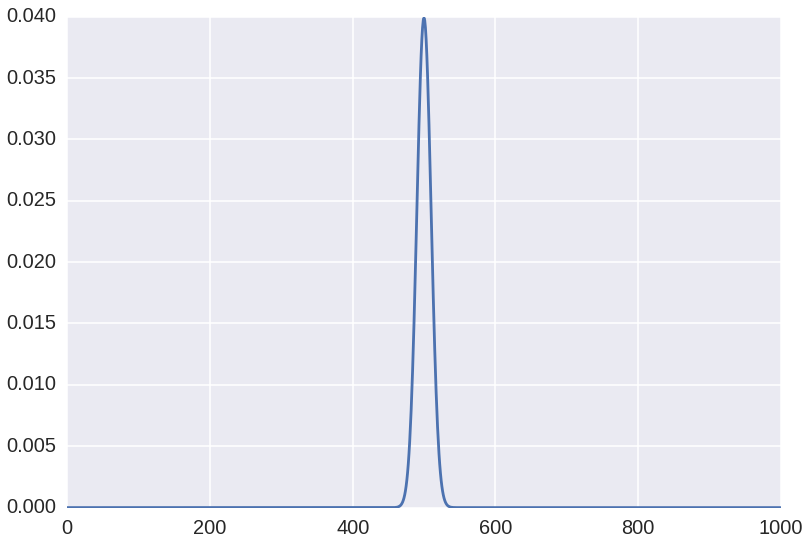

In [19]:
plt.plot(xgrid, fi)

Now to step this forwards.

In [20]:
# Define the advection operator

A = np.zeros((jmax, jmax), dtype=np.double)
for r in range(A.shape[0]):
    for c in range(A.shape[1]):
        to_the_right = (c+1)%A.shape[1]
        to_the_left = (c-1)%A.shape[1]
        if r == to_the_right:
            A[r, c] = -v[r]/(2*dx)
        elif r == to_the_left:
            A[r,c] = v[r]/(2*dx)

In [21]:
# Define the diffusion operator

zeta = np.zeros((jmax, jmax), dtype=np.double)
for r in range(zeta.shape[0]):
    for c in range(zeta.shape[1]):
        to_the_right = (c+1)%zeta.shape[1]
        to_the_left = (c-1)%zeta.shape[1]
        if r == to_the_right:
            zeta[r, c] = D/dx**2
        elif r == to_the_left:
            zeta[r,c] = D/dx**2
        elif r == c:
            zeta[r, c] = -2*D/dx**2

In [22]:
# Define the annoying reaction/growth operator

def G(f):
    return s*f*(1-f)

We now implement the solution.

In [23]:
# Define the identity operator
I = np.identity(jmax, dtype=np.double)

In [24]:
fi_original = fi.copy()

This currently takes too long, so I'm gonna cythonize it.

In [25]:
%load_ext cython

In [30]:
sol_in_time = np.zeros((jmax, imax), dtype=np.double)

fi = fi_original.copy()
sol_in_time[:, 0] =  fi[:, 0]

for i in range(imax):
    inv = np.linalg.inv(I - (dt/2.)*zeta)
    propagation = (I + dt*A + (dt/2.)*zeta).dot(fi)
    growth = dt*s*fi*(1-fi)
    
    fi_plus_1 = inv.dot(propagation + growth)
    sol_in_time[:, i] = fi_plus_1[:, 0]
    
    fi = fi_plus_1

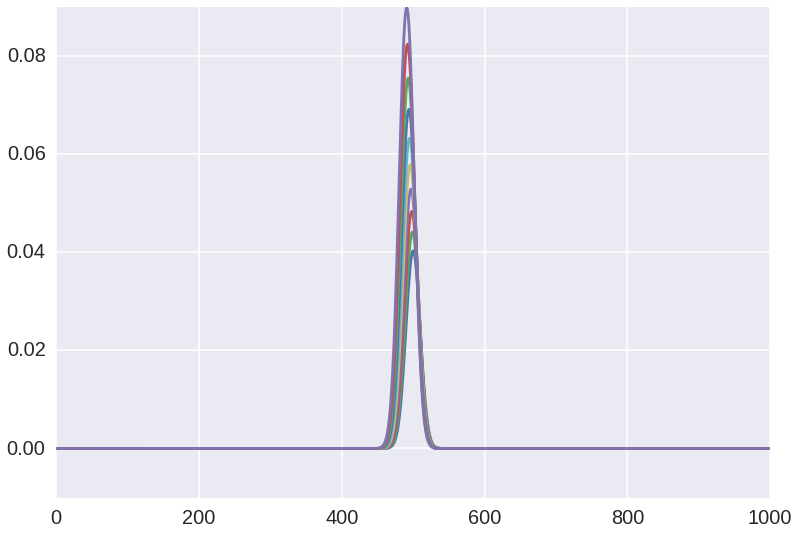

In [35]:
for i in range(0, sol_in_time.shape[1], 10):
    plt.plot(xgrid, sol_in_time[:, i])